In [10]:
%matplotlib inline
%precision 16
from __future__ import print_function
from six.moves import range
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 4: Initial Value Problems

## Question 1 - Lotka-Volterra

Consider the following system of equations
$$\begin{aligned}
    \frac{dp}{dt} &= b_0 \cdot p - d_0 \cdot p \cdot v \\
    \frac{dv}{dt} &= b_1 \cdot p \cdot v - d_1 \cdot v
\end{aligned}$$
where the unknown functions are $p(t)$ and $v(t)$ and $b_i, d_i \in \mathbb R^+$.  This system is commonly known as the Lotka-Volterra equations which model a simple predator-prey population model.  For our purposes the function $p(t)$ represents the population of tourists at the newly opened Jurassic Park (prey) and $v(t)$ the velociraptor population (predators).  Here we are also allowing the birth $b_i$ and death $d_i$ coefficients to vary in time with
$$
    b(t) = \begin{bmatrix}
        0.05 \cos^3(3 t / \pi) \\ 
        0.01 \sin^3(t / \pi)
    \end{bmatrix} \quad \quad \text{and} \quad \quad 
    d(t) = \begin{bmatrix}
        0.02 \cos(2 t / \pi) \\ 
        0.1 \sin(4 t / \pi)
    \end{bmatrix}
$$

**(a)** [5] Find the Jacobian of the right hand side $f(t, u)$ of the ODE system above and write a function that computes $f$ and the Jacobian $J$ given a $t$ and $u$.  Do not use `sympy` to write the Jacobian function although you can use it to check your answer.  We have provide the birth and death rate functions.

Let
$$
    u = \begin{bmatrix} p \\ v \end{bmatrix}
$$
then
$$f(t, u) = \begin{bmatrix} 
    b_0 p - d_0 p v \\
    b_1 p v - d_1 v
\end{bmatrix}
$$
and
$$
J(f(t, u)) = \begin{bmatrix}
    b_0 - d_0 v & - d_0 p \\
    b_1 v & b_1 p - d_1
\end{bmatrix}.$$

In [11]:
def birth_rates(t):
    return numpy.array([0.05 * numpy.cos(t * 3.0 / numpy.pi)**3, 
                        0.01 * numpy.sin(t       / numpy.pi)**3])

def death_rates(t):
    return numpy.array([0.02 * numpy.cos(t * 2.0 / numpy.pi), 
                        0.10 * numpy.sin(t * 4.0 / numpy.pi)])

def f(t, U):
    """Right hand side of system."""
    ### BEGIN SOLUTION
    b = birth_rates(t)
    d = death_rates(t)
    answer = numpy.array([b[0] * U[0] - d[0] * U[0] * U[1], 
                          b[1] * U[0] * U[1] - d[1] * U[1]])
    ### END SOLUTION
    return answer

def J(t, U):
    """Compute the Jacobian of the function f(t,u)"""
    ### BEGIN SOLUTION
    b = birth_rates(t)
    d = death_rates(t)
    answer = numpy.array([[b[0] - d[0] * U[1], -d[0] * U[0]],
                          [b[1] * U[1], b[1] * U[0] - d[1]]
                         ])
    ### END SOLUTION
    return answer

In [12]:
t = 1.0
U = numpy.array([32.0, 5.1])
f_solution = numpy.array([-2.316188606456715 , -0.4375625749832442])
numpy.testing.assert_allclose(f(t, U), f_solution)
J_solution = numpy.array([[-0.0723808939517723, -0.5146302900664267], [ 0.0015633065704327, -0.0857965833300479]])
numpy.testing.assert_allclose(J(t, U), J_solution)
### THIS IS SPARTA!
print("Success!")
### UPS... THIS IS NOT SPARTA

Success!


**(b)** [5] Use `scipy.integrate` to solve the system using the function you wrote above.

In [13]:
def solve_scipy(t, U_0):
    """Solve the system using scipy.integrate"""
    ### BEGIN SOLUTION
    
    import scipy.integrate as integrate
    
    U = numpy.empty((t.shape[0], 2))
    U[0, :] = U_0

    integrator = integrate.ode(f)
    integrator.set_integrator("dopri5")
    integrator.set_initial_value(U[0, :])

    for (n, t_n) in enumerate(t[1:]):
        integrator.integrate(t_n)
        if not integrator.successful():
            break
        U[n + 1, :] = integrator.y
    
    ### END SOLUTION
    return U

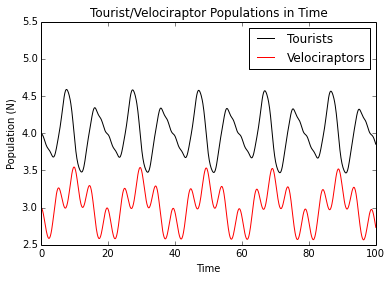

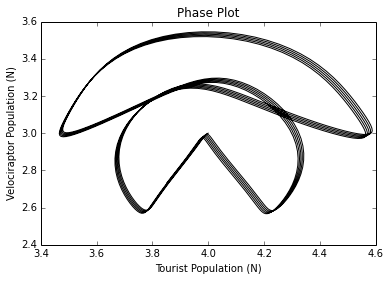

Success


In [14]:
t = numpy.linspace(0.0, 100.0, 1000)
U = solve_scipy(t, numpy.array([4.0, 3.0]))
U_true = numpy.array([[ 4.0,  3.0],
                      [ 3.9279172294167317,  3.5408818585097022],
                      [ 3.9830673083618886,  2.980274473969855 ],
                      [ 3.8004716403312524,  3.5000374537033361],
                      [ 3.9585778183108209,  2.9333231345441941],
                      [ 3.6950925707002193,  3.4300538999244909],
                      [ 3.9234384730566925,  2.8657982222073044],
                      [ 3.6145728074599934,  3.3401620269783758],
                      [ 3.8810111262801268,  2.7871140670350409],
                      [ 3.5554505511662997,  3.2417027488327261]])
numpy.testing.assert_allclose(U[::100], U_true)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, U[:, 0], 'k', label="Tourists")
axes.plot(t, U[:, 1], 'r', label="Velociraptors")
axes.set_title("Tourist/Velociraptor Populations in Time")
axes.set_xlabel("Time")
axes.set_ylabel("Population (N)")
axes.set_ylim((2.5, 5.5))
axes.legend()

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(U[:, 0], U[:, 1], 'k')
axes.set_title("Phase Plot")
axes.set_xlabel("Tourist Population (N)")
axes.set_ylabel("Velociraptor Population (N)")

plt.show()
### BEGIN HIDDEN TESTS
print("Success")
### END HIDDEN TESTS

**(c)** [10] Consider the case where we wanted to use an implicit method, in this case backward Euler.  Since the function $f(t, u)$ is non-linear we must make some approximation to find the solution to the problem.  In the first case take the resulting ODE discretization and use a Taylor expansion of $f(t, u)$ about $(t^n, u(t^n))$ to find a new linear system that can be inverted to find the solution.  Write down this update scheme explicitly.

Expanding the function $f$ about $t^n$ leads to
$$
    f(t^{n+1}, U^{n+1}) = f(t^{n}, U^{n}) + f_u(t^{n}, U^{n}) (U^{n+1} - U^n) + f_t(t^{n}, U^{n}) \Delta t + \cdots.
$$
Dropping the $\Delta t$ term (as this would become a higher order term once we plug it in below) we then have
$$\begin{aligned}
    U^{n+1} &= U^n + \Delta t f(t^{n+1}, U^{n+1}) \\
    &= U^n + \Delta t \left[ f(t^{n}, U^{n}) + f'(t^{n}, U^{n}) (U^{n+1} - U^n) \right]
\end{aligned}$$
truncating the Taylor series so that we retain the constant and linear terms.  Replacing $f'$ with the Jacobian $J$ and solving for $U^{n+1}$ then leads to
$$\begin{aligned}
    U^{n+1} &= U^n + \Delta t \left[ f(t^{n}, U^{n}) + J(t^{n}, U^{n}) (U^{n+1} - U^n) \right] \\
    U^{n+1} &= U^n + \Delta t f(t^{n}, U^{n}) + \Delta t J(t^{n}, U^{n}) U^{n+1} - \Delta t J(t^{n}, U^{n}) U^n \\
    (I - \Delta t J(t^{n}, U^{n})) U^{n+1} &= \left(I - \Delta t J(t^{n}, U^{n})\right) U^n + \Delta t f(t^{n}, U^{n})  \\
    U^{n+1} &= (I - \Delta t J(t^{n}, U^{n}))^{-1} \left[ \left(I - \Delta t J(t^{n}, U^{n})\right) U^n + \Delta t f(t^{n}, U^{n}) \right ] \\
    U^{n+1} &= U^n + (I - \Delta t J(t^{n}, U^{n}))^{-1} (\Delta t f(t^{n}, U^{n}))
\end{aligned}$$
or in simpler notation
$$
    U^{n+1} = U^n + \Delta t (I - \Delta t J^n)^{-1} f^n
$$

**(d)** [5] Write a function that computes the solution to the linearized system of equations from part (c) using the backward Euler method.  You may use `numpy.linalg.solve`.

In [15]:
def solve_linearization(t, U_0):
    """Solve the Tourist/Velociraptor problem using a linearization"""
    ### BEGIN SOLUTION
    delta_t = t[1] - t[0]
    U = numpy.empty((t.shape[0], 2))
    U[0, :] = U_0
    
    for n in range(t.shape[0] - 1):
        U[n+1, :] = U[n, :] + delta_t * numpy.linalg.solve(numpy.eye(2) - delta_t * J(t[n], U[n, :]), f(t[n], U[n, :]))
    
    ### END SOLUTION
    return U

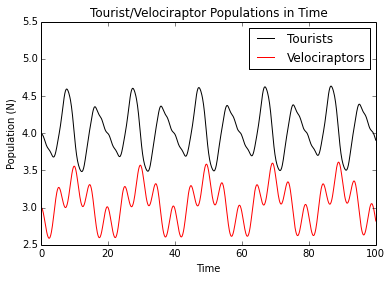

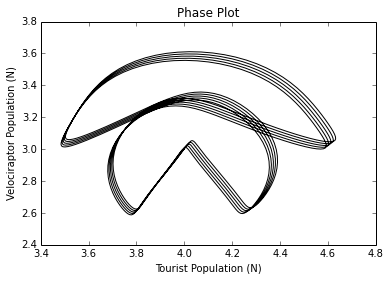

Success


In [16]:
t = numpy.linspace(0.0, 100.0, 1000)
U = solve_linearization(t, numpy.array([4.0, 3.0]))
U_true = numpy.array([[ 4.                ,  3.                ],
                      [ 3.9562704025807616,  3.5550168469660899],
                      [ 3.9946656738865847,  3.0008012236746606],
                      [ 3.8363199595503161,  3.5396965282316728],
                      [ 3.9822873402068408,  2.9733440899499959],
                      [ 3.7357914034866888,  3.4934127671296538],
                      [ 3.9586406842928703,  2.9233357150626329],
                      [ 3.6590999818099319,  3.424489869445619 ],
                      [ 3.9260233789064363,  2.8596477917259606],
                      [ 3.6040049623838342,  3.3438868112108282]])
numpy.testing.assert_allclose(U[::100], U_true)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, U[:, 0], 'k', label="Tourists")
axes.plot(t, U[:, 1], 'r', label="Velociraptors")
axes.set_title("Tourist/Velociraptor Populations in Time")
axes.set_xlabel("Time")
axes.set_ylabel("Population (N)")
axes.set_ylim((2.5, 5.5))
axes.legend()

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(U[:, 0], U[:, 1], 'k')
axes.set_title("Phase Plot")
axes.set_xlabel("Tourist Population (N)")
axes.set_ylabel("Velociraptor Population (N)")

plt.show()
### BEGIN HIDDEN TESTS
print("Success")
### END HIDDEN TESTS

**(e)** [10] Again consider the use of backward Euler on the above system.  Now apply Newton's method to solve the system.  Formulate the approach mentioned writing down the eventual system of linear equations that need to be solved.  Make sure to explicitly write down this system.

Using backward Euler again we have
$$
    U^{n+1} = U^n + \Delta t f(t^{n+1}, U^{n+1})
$$
Define a function $G(U)$ as
$$
    G(U) = U - U^n - \Delta t f(t^{n+1}, U)
$$
We now want to solve for the root  
$$
    G(U) = 0
$$
which would then give us $U^{n+1}$, here we will do this using Newton's method.

Introducing a new index $k$ we can expand $G(U^{k+1})$ about $U^k$ such that
$$
    G(U^{k+1}) = G(U^{k}) + G'(U^k) (U^{k+1} - U^k) + \cdots.
$$
Using a fixed point iteration and dropping higher order terms the expression above can be written as
$$
    G'(U^k) \delta = - G(U^{k})
$$
where $\delta = U^{k+1} - U^k$.  We therefore must solve the system
$$
G'(U^k) \delta = -G(U^k)
$$
and update the solution to
$$
    U^{k+1} = U^{k} + \delta.
$$
The final task then is to compute the Jacobian of $G(U)$ which is
$$\begin{aligned}
    G'(U^k) &= \begin{bmatrix}
        \frac{\partial G_0}{\partial U_0} & \frac{\partial G_0}{\partial U_1} \\
        \frac{\partial G_1}{\partial U_0} & \frac{\partial G_1}{\partial U_1} \\
    \end{bmatrix} \\
    &= \begin{bmatrix}
        1 - \Delta t \frac{\partial f_0}{\partial U_0} & - \Delta t \frac{\partial f_0}{\partial U_1} \\
        - \Delta t \frac{\partial f_1}{\partial U_0} & 1 - \Delta t \frac{\partial f_1}{\partial U_1} \\
    \end{bmatrix} \\
    &= I - \Delta t J(U^k)
\end{aligned}$$
where $J$ is the Jacobian of the function $f$.

**(f)** [10] Implement the method you derived in (e).  You may use `numpy.linalg.solve`.

In [17]:
def solve_newton(t, U_0, tolerance=1e-3):
    """"""
    ### BEGIN SOLUTION
    MAX_ITERATIONS = 100
    delta_t = t[1] - t[0]
    U = numpy.empty((t.shape[0], 2))
    U[0, :] = U_0
    
    # Timestep loop
    for n in range(t.shape[0] - 1):
        
        # Use previous time step as the initial guess
        U[n + 1, :] = U[n, :] + delta_t * f(t[n], U[n, :])
        success = False
        for k in range(MAX_ITERATIONS):
            # Solve for delta - note that U[n + 1, :] is U^k
            G = U[n + 1, :] - U[n, :] - delta_t * f(t[n+1], U[n + 1, :])
            delta = numpy.linalg.solve(numpy.eye(2) - delta_t * J(t[n+1], U[n + 1, :]), -G)
            U[n + 1, :] += delta
            
            if numpy.linalg.norm(delta) < tolerance:
                success = True
                break
                
        if not success:
            raise ValueError("Newton iteration failed to converge!")
    
    ### END SOLUTION
    return U

array([[ 4.                ,  3.                ],
       [ 3.9134711587698621,  3.5492962948498041],
       [ 3.993051768690675 ,  2.9903348091007791],
       [ 3.7994886830475982,  3.5222458634363463],
       [ 3.9768706205072397,  2.9540238468450442],
       [ 3.7073585320513733,  3.4668124688804647],
       [ 3.949477156072585 ,  2.8980683840505561],
       [ 3.6389101980734244,  3.3924679490702587],
       [ 3.915300183652235 ,  2.8320597747641201],
       [ 3.5902204686663102,  3.3106237318481271]])


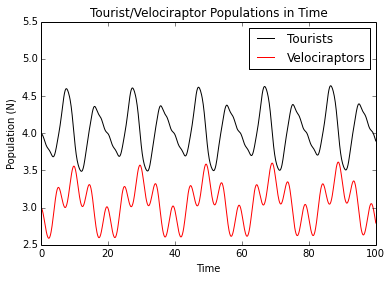

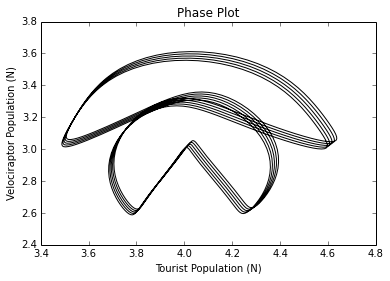

Success


In [18]:
t = numpy.linspace(0.0, 100.0, 1000)
U = solve_newton(t, numpy.array([4.0, 3.0]), tolerance=1e-3)
print(repr(U[::100]))
U_true = numpy.array([[ 4.                ,  3.                ],
                      [ 3.9134711585015927,  3.5492962949915734],
                      [ 3.9930517703869257,  2.9903348084254571],
                      [ 3.7994886843948481,  3.5222458630304252],
                      [ 3.9768706240486029,  2.9540238459613501],
                      [ 3.7073585349850822,  3.4668124684596084],
                      [ 3.9494771605525214,  2.8980683829809037],
                      [ 3.6389102010408898,  3.3924679483427114],
                      [ 3.9153001879623379,  2.8320597734640938],
                      [ 3.5902204721540936,  3.310623730889021 ]])
numpy.testing.assert_allclose(U[::100], U_true)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, U[:, 0], 'k', label="Tourists")
axes.plot(t, U[:, 1], 'r', label="Velociraptors")
axes.set_title("Tourist/Velociraptor Populations in Time")
axes.set_xlabel("Time")
axes.set_ylabel("Population (N)")
axes.set_ylim((2.5, 5.5))
axes.legend()

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(U[:, 0], U[:, 1], 'k')
axes.set_title("Phase Plot")
axes.set_xlabel("Tourist Population (N)")
axes.set_ylabel("Velociraptor Population (N)")

plt.show()
### BEGIN HIDDEN TESTS
print("Success")
### END HIDDEN TESTS

**(g)** [10] How might you go about choosing an appropriate method for an approach to this problem?  Does this apply generically to systems of ODEs explaining why or why not?  Back up your decision with appropriate computational evidence.

## Question 2 - Ratio $R(z)$

Any $r$-stage Runge-Kutta method (and other one-step methods) applied to $u'=\lambda u$ will give an
expression of the form
$$
    U^{n+1} = R(z)U^n
$$
where $z=\lambda \Delta t$ and $R(z)$ is a rational function, a ratio of
polynomials in $z$ each having degree at most $r$.  For an explicit method
$R(z)$ will simply be a polynomial of degree $r$ and for an implicit method
it will be a more general rational function.

Since $u(t_{n+1}) = e^z u(t_n)$ for this problem, we expect that a $p$th
order accurate method will give a function $R(z)$ satisfying
$$
    R(z) = e^z + \mathcal{O}(z^{p+1}) \quad\text{as}~~~~z \rightarrow 0,
$$
as discussed in the Remark on page 129 of LeVeque.  The rational function $R(z)$ also
plays a role in stability analysis.

One can determine the value of $p$ in the last equation by expanding $e^z$ in a Taylor
series about $z=0$, writing the $\mathcal{O}(z^{p+1})$ term as
$$
    C z^{p+1} + \mathcal{O}(z^{p+2}),
$$
multiplying through by the denominator of $R(z)$, and then collecting terms.
For example, for the trapezoidal method
$$
    \frac{1+z/2}{1-z/2} = \left(1+z+\frac 1 2 z^2 + \frac 1 6 z^3 + \cdots\right) +Cz^{p+1} + \mathcal{O}(z^{p+2})
$$
gives
$$
    \begin{split}
        1+\frac{1}{2} z &= \left(1-\frac{1}{2} z\right)\left( 1+z+\frac{1}{2} z^2 + \frac 1 6 z^3 + \cdots\right) + Cz^{p+1} + \mathcal{O}(z^{p+2})\\
                  &= 1 + \frac{1}{2} z - \frac{1}{12} z^3 + \cdots + Cz^{p+1}  + \mathcal{O}(z^{p+2})
    \end{split}
$$
and so
$$
    Cz^{p+1} = \frac{1}{12} z^3 + \cdots,
$$
from which we conclude that $p=2$.

**(a)** [5] Let 
$$
    R(z) = \frac{1 + \frac 1 3 z}{1 - \frac 2 3 z + \frac 1 6 z^2}.
$$
Determine $p$ for this rational function as an approximation to $e^z$.

$\mathcal R(z)$ approximates $e^z$ means that 

$$
    \mathcal R(z) \approx e^z = \sum_{k=0}^{\infty} \frac{1}{k!} z^k
$$

We determine the smallest exponent $p$, for which the series expansion of $e^z$ does not coincide with $\mathcal R(z)$.

$$\begin{aligned}
 \frac{1 + \frac 1 3 z}{1 - \frac 2 3 z + \frac 1 6 z^2} &= \left(1+z+\frac 1 2 z^2 + \frac 1 6 z^3 + \cdots\right) +Cz^{p+1} + \mathcal{O}(z^{p+2})\\
 \Leftrightarrow 1 + \frac 1 3 z &= (1 - \frac 2 3 z + \frac 1 6 z^2)\left(1+z+\frac 1 2 z^2 + \frac 1 6 z^3 + \cdots\right) +Cz^{p+1} + \mathcal{O}(z^{p+2})\\
 \Leftrightarrow 1 + \frac 1 3 z &= 1 + \frac 1 3 z + \frac {5} {77} z^4 + \dots + Cz^{p+1} + \mathcal(z^{p+2}).
 %
 \end{aligned}$$
 
 The fourth-order term has a non-vanishing coefficient and therefore we obtain
 
 $$
     Cz^{p+1} = \frac {5} {77} z^4  ,
 $$
 
 from which we conclude that p=3.

**(b)** [10] Determine $R(z)$ and $p$ for the backward Euler method.

The backward Euler method has the form:
    
$$
    U^{n+1} = U^n + \Delta t \lambda U^{n+1}
$$

and therefore, we have

$$\begin{aligned}
   U^{n+1} = \frac{1}{1-z} U^n \qquad \Rightarrow \mathcal R(z) = \frac{1}{1-z}
\end{aligned}$$

To determine $p$, we again set

$$\begin{aligned}
\frac{1}{(1 - z)} &= \left(1+z+\frac 1 2 z^2 + \frac 1 6 z^3 + \cdots\right) +Cz^{p+1} + \mathcal{O}(z^{p+2})\\
\Leftrightarrow1 &= (1 - z)\left(1+z+\frac 1 2 z^2 + \frac 1 6 z^3 + \cdots\right) +Cz^{p+1} + \mathcal{O}(z^{p+2})\\
\Leftrightarrow 1 &= 1 -\frac 1 2 z^2+ \dots + C z^{p+1}+ \mathcal(z^{p+2})
\end{aligned}$$

and so 
 
 $$
     Cz^{p+1} = -\frac 1 2 z^2 
 $$
 
 from which we conclude that p=1.

**(c)** [10] Determine $R(z)$ and $p$ for the 2-stage, 2nd order accurate Runge-Kutta method.

RK2 has the form
$$\begin{aligned}
    U^* &= U^n + \frac{1}{2} \Delta t f(U^n) \\
    U^{n+1} &= U^n + \Delta t f(U^*)
\end{aligned}$$
which plugging in and rewriting the two steps turns into
$$\begin{aligned}
    U^{n+1} &= U^n + \Delta t f(U^n + \frac{1}{2} \Delta t f(U^n)) \\
    &= U^n + \Delta t \lambda \left( U^n + \frac{\Delta t}{2} \lambda U^n \right ) \\
    &= \left(1 + z + \frac{z^2}{2} \right) U^n \\
\end{aligned}$$
leading to
$$
    R(z) = 1 + z + \frac{z^2}{2} = \frac{2 + 2z + z^2}{2}.
$$
We can then compute $p$ as
$$\begin{aligned}
    \frac{2 + 2z + z^2}{2} &= 1 + z + \frac{1}{2} z^2 + \frac{1}{6} z^3 + \cdots + C r^{p+1} + \mathcal{O}(z^{p+2}) \\
    2 + 2z + z^2 &= 2 + 2 z + z^2 + \frac{1}{3} z^3 + \cdots + C r^{p+1} + \mathcal{O}(z^{p+2})
\end{aligned}$$
which canceling terms from both sides leads to the conclusion that $p = 2$.

**(d)** [10] Determine  $R(z)$ and $p$ for the TR-BDF2 given by
$$\begin{aligned}
    U^\ast &= U^n + \frac{\Delta t}{4} (f(U^n) + f(U^\ast)) \\
    U^{n+1} &= \frac{1}{3} (4 U^\ast - U^n + \Delta t f(U^{n+1})).
\end{aligned}$$
This method is a predictor-corrector method that combines the trapezoidal rule and a two-step backwards difference formula (hence the name).

We can rewrite the first step as
$$
    U^\ast = U^n + \frac{\Delta t}{4} (\lambda U^n + \lambda U^\ast) \Rightarrow \\
    U^\ast ( 1 - z / 4 ) = (1 + z / 4) U^n \Rightarrow \\
    U^\ast = \frac{1 + z / 4}{1 - z/4} U^n.
$$
Plugging this into the second stage we have
$$\begin{aligned}
    U^{n+1} &= \frac{1}{3} \left [4 \left( \frac{1 + z / 4}{1 - z/4} \right ) U^n - U^n + z U^{n+1} \right ] \\
    U^{n+1} \left(1 - \frac{z}{3} \right)&= \frac{1}{3} \left( \frac{4 + z}{1 - z/4} - 1\right ) U^n \\
    U^{n+1} &= \frac{1}{3 - z} \left( \frac{4 + z - 1 + \frac{z}{4}}{1 - z/4}\right ) U^n \\
    U^{n+1} &= \frac{1}{3 - z} \left( \frac{3 + \frac{5z}{4}}{1 - z/4}\right ) U^n \\
    U^{n+1} &= \frac{3 + \frac{5z}{4}}{(3 - z)(1 - z/4)}U^n \\
\end{aligned}$$
leading to
$$
    R(z) = \frac{3 + \frac{5z}{4}}{(3 - z)(1 - z/4)} = \frac{12 + 5z}{(12 - 4z)(1 - z/4)} = \frac{12 + 5z}{12 - 7 z+ z^2}.
$$

Moving on to the computation of $p$ we have
$$\begin{aligned}
    \frac{12 + 5z}{12 - 7 z+ z^2} &= 1 + z + \frac{1}{2} z^2 + \frac{1}{6} z^3 + \cdots + C r^{p+1} + \mathcal{O}(z^{p+2}) \\
    12 + 5z &= (12 - 7 z+ z^2) \left( 1 + z + \frac{1}{2} z^2 + \frac{1}{6} z^3 + \cdots + C r^{p+1} + \mathcal{O}(z^{p+2}) \right) \\
    12 + 5z &= 12 + 5 z -2 z^3 - \frac{2}{3} z^4 + \cdots + C r^{p+1} + \mathcal{O}(z^{p+2})
\end{aligned}$$
leading to the conclusion that $p = 2$.

**(e)** [5] What does $p$ represent?  Explain why this is an equivalent way to find this value in this particular case.